In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = "/content/deliveries (1).csv"
df = pd.read_csv(file_path)


In [ ]:
df['extras_type'].fillna("No Extra", inplace=True)
df['player_dismissed'].fillna("Not Out", inplace=True)
df['dismissal_kind'].fillna("None", inplace=True)
df['fielder'].fillna("None", inplace=True)

print(df.isnull().sum())

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


<ipython-input-17-c78af6e5fd7c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['extras_type'].fillna("No Extra", inplace=True)
<ipython-input-17-c78af6e5fd7c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

##Team-wise Total Runs Scored

<ipython-input-18-7901c4009a2c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.index, y=team_runs.values, palette="coolwarm")


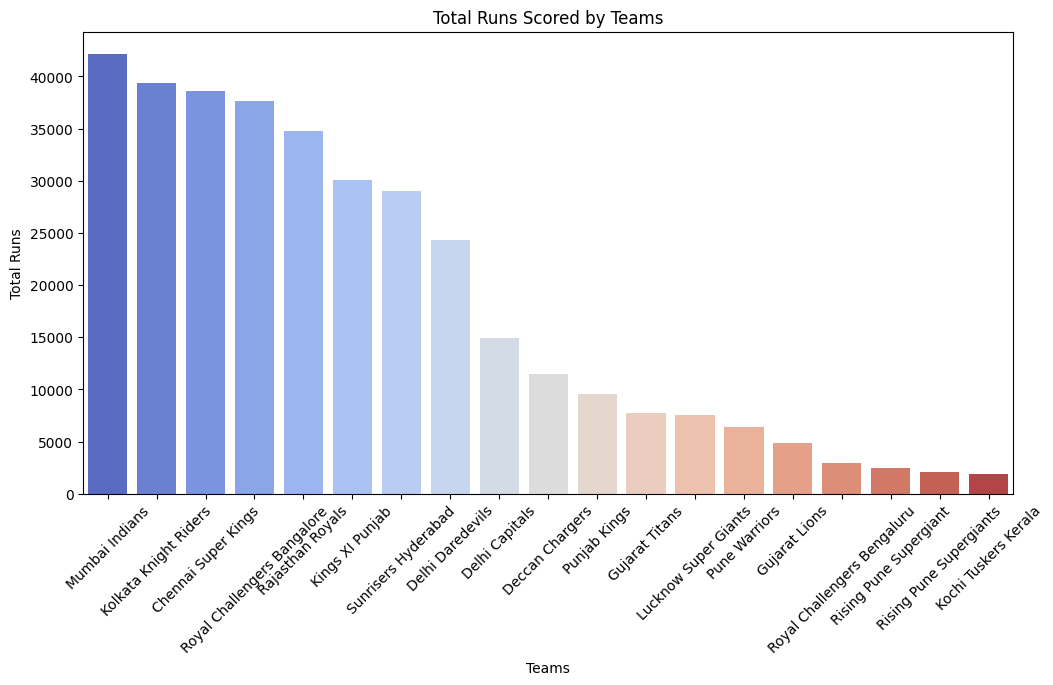

In [ ]:
team_runs = df.groupby("batting_team")["total_runs"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.index, y=team_runs.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Total Runs")
plt.title("Total Runs Scored by Teams")
plt.show()


##Most Wickets Taken by Bowlers

<ipython-input-19-d1ccab6a4508>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wicket_counts.index, y=wicket_counts.values, palette="Blues_r")


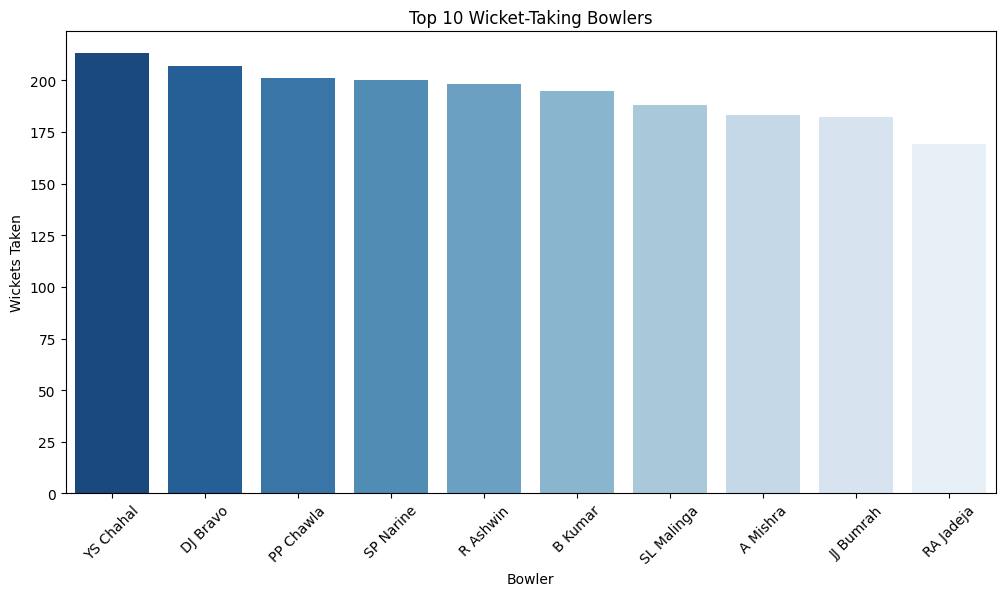

In [ ]:
wicket_counts = df[df["dismissal_kind"] != "None"]["bowler"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=wicket_counts.index, y=wicket_counts.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Bowler")
plt.ylabel("Wickets Taken")
plt.title("Top 10 Wicket-Taking Bowlers")
plt.show()


##Top 10 batsmen with most four

<ipython-input-20-0c7079631c76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fours.index, y=fours.values, palette="Purples")


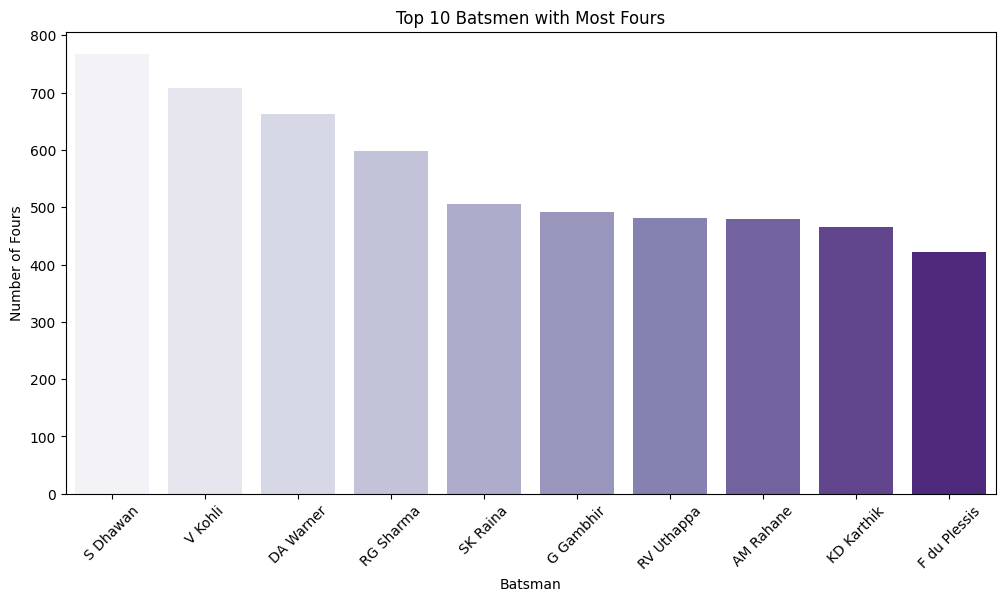

In [ ]:
fours = df[df["batsman_runs"] == 4]["batter"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=fours.index, y=fours.values, palette="Purples")
plt.xticks(rotation=45)
plt.xlabel("Batsman")
plt.ylabel("Number of Fours")
plt.title("Top 10 Batsmen with Most Fours")
plt.show()


##Boundary Distribution Across Overs

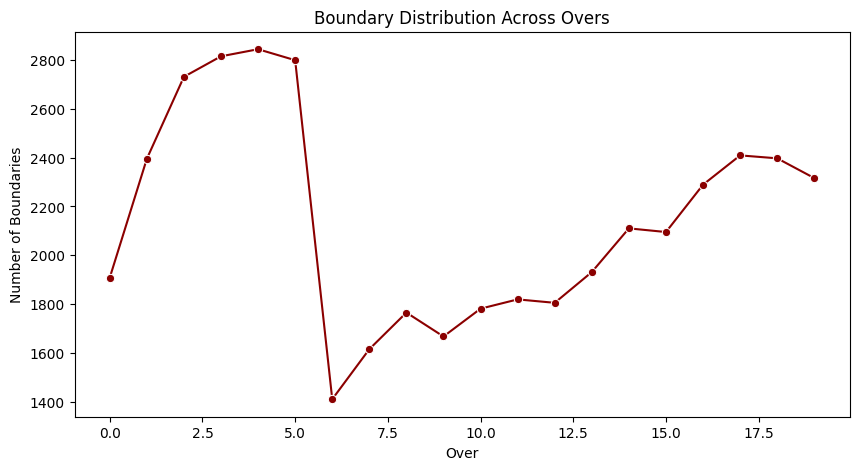

In [ ]:
boundary_overs = df[df["batsman_runs"].isin([4, 6])].groupby("over")["batsman_runs"].count()

plt.figure(figsize=(10, 5))
sns.lineplot(x=boundary_overs.index, y=boundary_overs.values, marker="o", color="darkred")
plt.xlabel("Over")
plt.ylabel("Number of Boundaries")
plt.title("Boundary Distribution Across Overs")
plt.show()


<ipython-input-10-4331f2dd6bc3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_appearances.index, y=player_appearances.values, palette="plasma")


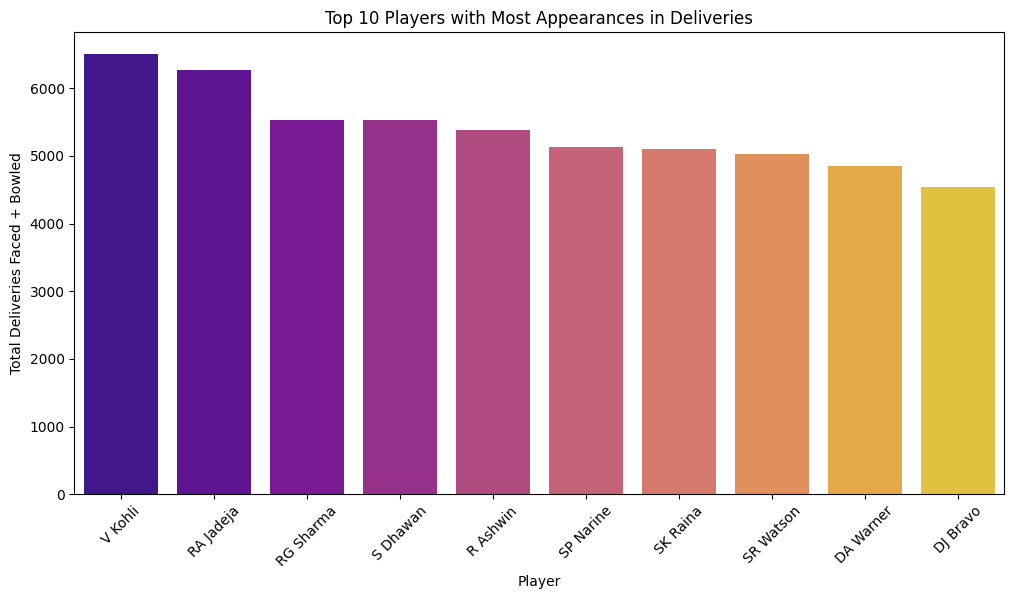

In [ ]:
player_appearances = df["batter"].value_counts().add(df["bowler"].value_counts(), fill_value=0).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=player_appearances.index, y=player_appearances.values, palette="plasma")
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Total Deliveries Faced + Bowled")
plt.title("Top 10 Players with Most Appearances in Deliveries")
plt.show()
